# **Лабораторная работа №4**
## **Вариант №4 Давар Рафаил Таймурович 4215**

## **Часть 1**

**1) Использовать функцию для создания набора данных.**

Дана функция для создания набора данных, где:

* n - число объектов в каждой группе,
* seed - зерно, необходимое для воспроизводимости случайных значений.

В результате применения получается DataFrame, содержащий заданное число объектов в каждой группе (всего 3 группы) с двумя признаками: 'x' и 'y'

In [4]:
import numpy as np
import pandas as pd

def make_data(n, seed):
  np.random.seed(seed)

  shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])

  data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
  data = np.swapaxes(data, 1, 2)
  data = data.reshape((-1, 2))
  data *= np.array([[20, 0.5]])

  df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, columns=['x', 'y'])
  df = df.sample(frac=1.0)

  return df
    

**2) В результате применения получается  DataFrame , содержащий заданное число объектов в каждой группе
(всего 3 группы) с двумя признаками:  'x'  и  'y' .
Получить с помощью этой функции два набора данных
train и test . (выбрать параметр n от 30 до 100), а параметр seed для train и test выбирать разный,
любой).**

С помощью функции создания набора данных, создаётся два набора данных train и test.

<Axes: xlabel='x', ylabel='y'>

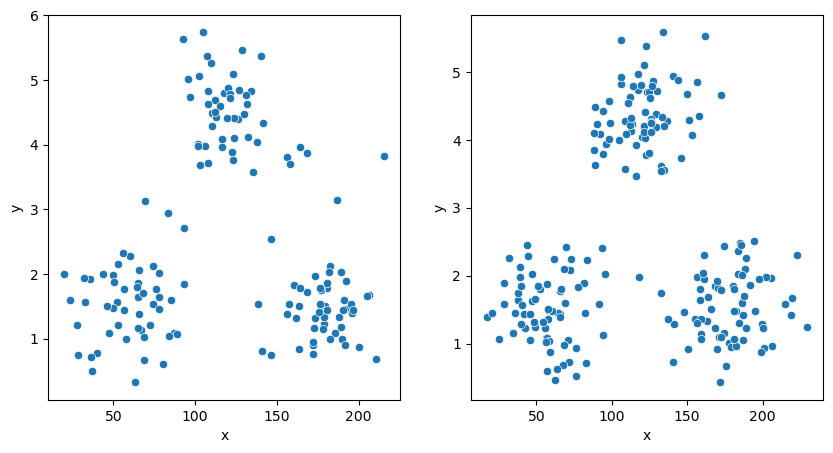

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train = make_data(50, 55)
X_test = make_data(70, 77)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(ax=axes[0], x='x', y='y', data=X_train)
sns.scatterplot(ax=axes[1], x='x', y='y', data=X_test)

**3) Провести стандартизацию данных.**

После чего необходимо провести стандартизацию данных с помощью модуля sklearn.preprocessing.

Стандартизация преобразует данные таким образом, что их математическое ожидание равно 0, а стандартное отклонение равно 1. Для этого из исходного значения признака вычитается среднее, и эта разность делится на стандартное отклонение. Таким образом, данные имеют вид стандартного нормального распределения, что позволяет минимизировать среднеквадратичную ошибку.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # создание объекта класса Scaler
X_train_scaled = scaler.fit_transform(X_train) # обучение стандартизатора
X_test_scaled = scaler.fit_transform(X_test) # преобразование данных с помощью transform

**4) Далее с помощью метода .fit_predict обучается модель для кластеризации методом Kmeans для трёх кластеров. После чего выполняется получение метки кластеров**

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_means = KMeans(n_clusters = 3, random_state = 0) # в параметрах задается число кластеров, равное 3, и фиксируется значение random_state для воспроизводимости результата
train_labels = k_means.fit_predict(X_train_scaled)

sil_score = silhouette_score(X_train_scaled, train_labels)
print('Коэфф. Силуэта:', sil_score)

Коэфф. Силуэта: 0.6998858294395582


**5) Провести визуализацию кластеров с помощью scatter . Пометить на графике центры кластеров.
Покрасить объекты из разных кластеров разными цветам**

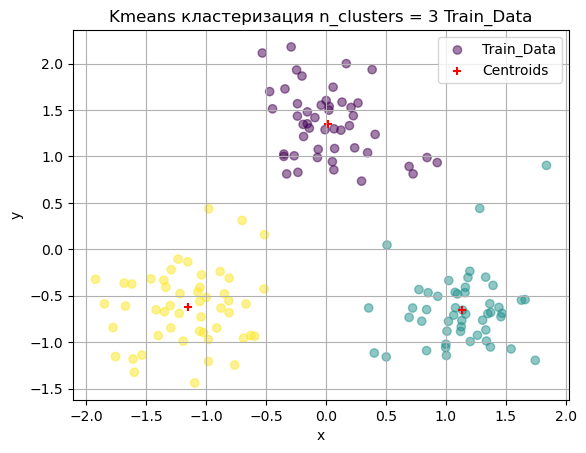

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_labels, cmap='viridis', marker='o', alpha=0.5, label='Train_Data') # визуализация кластеров
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='+', label='Centroids') # визуализация центров кластеров

plt.title('Kmeans кластеризация n_clusters = 3 Train_Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Из полученного графика видно, что разбиение на 3 кластера достаточно верное, центры кластеров находятся практически в центрах групп.

**6) Использовать тестовые данные test и выполнить предсказание с помощью predict . Построить графики
для тестовых данных. Пометить на графике центры кластеров. Покрасить объекты из разных кластеров разными цветами.**

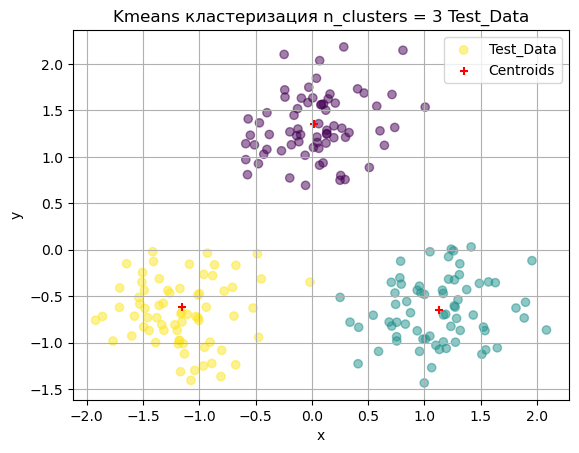

In [28]:
test_labels = k_means.predict(X_test_scaled)

plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_labels, cmap='viridis', marker='o', alpha=0.5, label='Test_Data') # визуализация кластеров
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='+', c='red', label='Centroids') # визуализация центров кластеров

plt.title('Kmeans кластеризация n_clusters = 3 Test_Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

По полученному графику можно сказать, что модель весьма точно предсказывает значения.

**7) Подсчитать коэффициент силуэта.**


Подсчитан коэффициент силуэта, показывающий на сколько хорошо выполнена кластеризация. Значение силуэта находится в диапозоне от -1 до +1.

In [33]:
from sklearn.metrics import silhouette_score

train_score = silhouette_score(X_train_scaled, train_labels)
print("Качество кластеризации по метрике Cилуэта для train data:", train_score)

test_score = silhouette_score(X_test_scaled, test_labels)
print("Качество кластеризации по метрике Cилуэта для test data:", test_score)

Качество кластеризации по метрике Cилуэта для train data: 0.6998858294395582
Качество кластеризации по метрике Cилуэта для test data: 0.7014104217514554


По полученным значениям видно, что тестовая модель лучше предсказывает значения, так как коэффициент силуэта больше коэффициента тренировной модели.

**8) Повторить пункты 4-7 для n_clusters = 2 и n_clusters = 4 . Сравнить результаты и сделать выводы.**


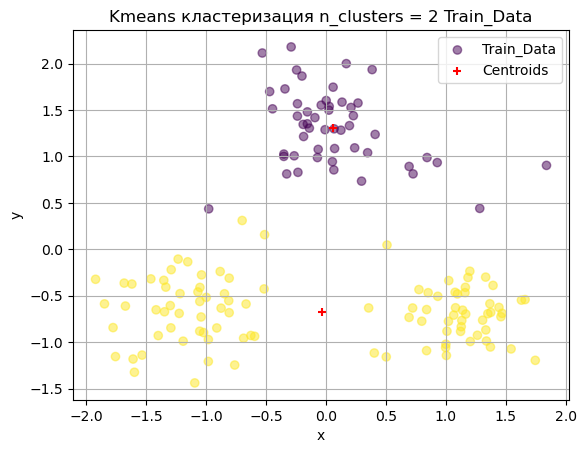

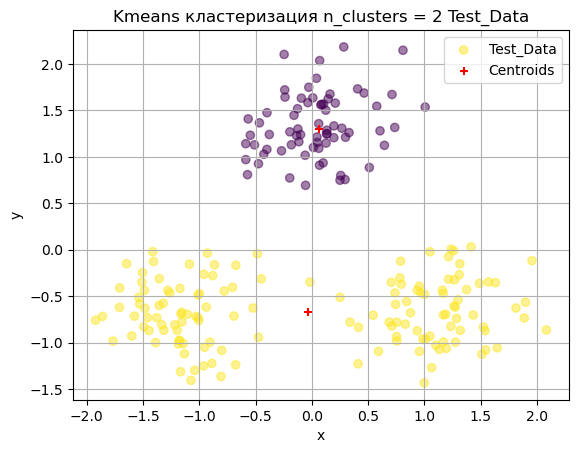

Качество кластеризации по метрике Cилуэта для train data: 0.47341211052577553
Качество кластеризации по метрике Cилуэта для test data: 0.48253273705680194


In [37]:
k_means = KMeans(n_clusters = 2, random_state = 0) # в параметрах задается число кластеров, равное 2, и фиксируется значение random_state для воспроизводимости результата
train_labels = k_means.fit_predict(X_train_scaled)

# Визуализация train data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_labels, cmap='viridis', marker='o', alpha=0.5, label='Train_Data') # визуализация кластеров
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='+', label='Centroids') # визуализация центров кластеров

plt.title('Kmeans кластеризация n_clusters = 2 Train_Data')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Визуализация test data
test_labels = k_means.predict(X_test_scaled)

plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_labels, cmap='viridis', marker='o', alpha=0.5, label='Test_Data') # визуализация кластеров
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='+', c='red', label='Centroids') # визуализация центров кластеров

plt.title('Kmeans кластеризация n_clusters = 2 Test_Data')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Коэффициент силуэта
train_score = silhouette_score(X_train_scaled, train_labels)
print("Качество кластеризации по метрике Cилуэта для train data:", train_score)

test_score = silhouette_score(X_test_scaled, test_labels)
print("Качество кластеризации по метрике Cилуэта для test data:", test_score)

По полученному графику видно, что один из центров кластера находится между двух групп, то есть разделение на 2 кластера ухудшило модель, а предсказания ухудшатся. Также можно сказать, что тестовая также лучше предсказывает значения по сравнению с тренировочной моделью, это видно из коэффициентов силуэта.

Эти действия были проведены и для четырех кластеров.

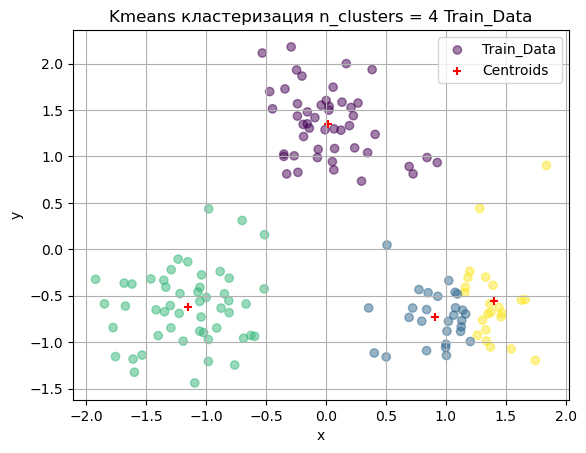

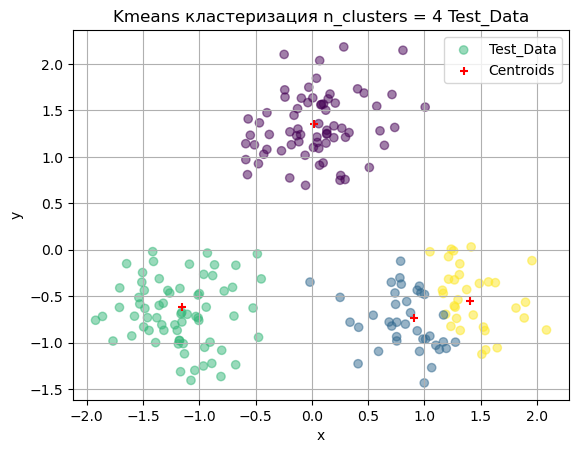

Качество кластеризации по метрике Cилуэта для train data: 0.5390835087431259
Качество кластеризации по метрике Cилуэта для test data: 0.5752459310592811


In [40]:
k_means = KMeans(n_clusters = 4, random_state = 0) # в параметрах задается число кластеров, равное 4, и фиксируется значение random_state для воспроизводимости результата
train_labels = k_means.fit_predict(X_train_scaled)

# Визуализация train data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_labels, cmap='viridis', marker='o', alpha=0.5, label='Train_Data') # визуализация кластеров
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='+', label='Centroids') # визуализация центров кластеров

plt.title('Kmeans кластеризация n_clusters = 4 Train_Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# Визуализация test data
test_labels = k_means.predict(X_test_scaled)

plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_labels, cmap='viridis', marker='o', alpha=0.5, label='Test_Data') # визуализация кластеров
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='+', c='red', label='Centroids') # визуализация центров кластеров

plt.title('Kmeans кластеризация n_clusters = 4 Test_Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

# Коэффициент силуэта
train_score = silhouette_score(X_train_scaled, train_labels)
print("Качество кластеризации по метрике Cилуэта для train data:", train_score)

test_score = silhouette_score(X_test_scaled, test_labels)
print("Качество кластеризации по метрике Cилуэта для test data:", test_score)

Vодель разбила одну группу на два кластера. Коэффициенты силуэта показывает, что качество кластеризации выше, чем при двух кластерах.

Построим график по методу локтя. Он позволит найти оптимальное количество кластеров, определив точку на графике, где изменение суммы квадратов расстояний между точками и центроидами кластеров перестаёт значительно изменяться.

**9) Построить график по “методу локтя и сделать выводы.**


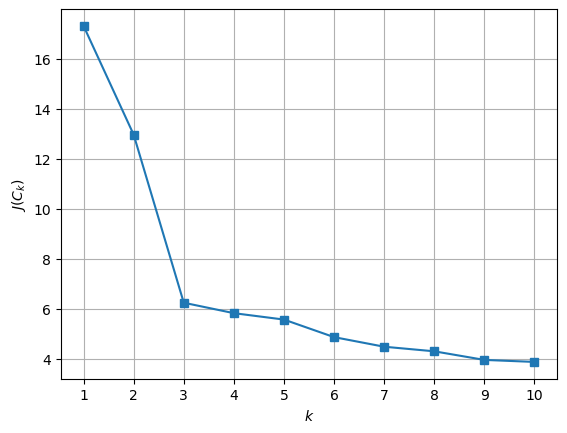

In [44]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train_scaled)
  inertia.append(np.sqrt(kmeans.inertia_))

plt.xticks(np.arange(0, 11, step=1))
plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

Суть метода заключается в том, чтобы найти точку на графике, где изменение суммы квадратов расстояний между точками и центроидами кластеров перестает значительно меняться.

По полученному графику можно найти количество кластеров, при котором тестовые значения перестают сильно отличаться от тренировочных. Таким значением количества кластеров будет 3, но при меньшем значении количества кластеров картина будет портиться и центры кластеризации будут находится между группами, что приводит к уменьшению точности.

## **Часть 2**

Набор данных **4heart2.csv**

Данные о болезнях сердца:
 1. возраст: возраст пациента (лет)
 2. анемия: снижение количества эритроцитов или гемоглобина (логическое значение)
 3. высокое кровяное давление: если у пациента гипертония (логическое значение)
 4. креатининфосфокиназа КФК уровень фермента КФК в крови (мкг/л)
 5. диабет: если у пациента диабет (логическое значение)
 6. фракция выброса: процент крови, покидающей сердце при каждом сокращении (в процентах)
 7. тромбоциты: тромбоциты в крови (килотромбоциты/ мл)
 8. пол: женщина или мужчина (бинарный)
 9. креатинин сыворотки: уровень креатинина сыворотки в крови (мг/дл)
 10. натрий сыворотки: уровень натрия сыворотки в крови (мэкв/л)
 11. курение: если пациент курит или нет (логическое)
 12. время: период наблюдения (дни)
 13. событие смерти: если пациент умер в течение периода наблюдения (логическое значение)

Для начала необходимо загрузить датасет, после чего проводится обработка данных для дальнейшей работы с загруженным датасетом.

In [55]:
import pandas as pd
df = pd.read_csv('4heart2.csv', sep=",")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Датасет содержит 299 записей, а пропусков нет. Все данные количественные.

Далее данные проверяются на наличие явных дубликатов с помощью метода duplicated().


In [61]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [64]:
display(df.duplicated().sum())

0

Явных дубликатов в датасете не наблюдается.

Теперь производится поиск неявных дубликатов или ошибочных данных, для этого просматриваются уникальные значения с помощью метода unique().

In [70]:
print(df['age'].unique())
print(df['anaemia'].unique())
print(df['high_blood_pressure'].unique())
print(df['diabetes'].unique())
print(df['sex'].unique())
print(df['smoking'].unique())
print(df['time'].unique())
print(df['DEATH_EVENT'].unique())
print(df['ejection_fraction'].unique())

[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[  4   6   7   8  10  11  12  13  14  15  16  20  22  23  24  26  27  28
  29  30  31  32  33  35  38  40  41  42  43  44  45  50  54  55  59  60
  61  63  64  65  66  67  68  71  72  73  74  75  76  77  78  79  80  82
  83  85  86  87  88  90  91  94  95  96  97 100 104 105 106 107 108 109
 110 111 112 113 115 117 118 119 120 121 123 126 129 130 134 135 140 145
 146 147 148 150 154 162 170 171 172 174 175 180 185 186 187 188 192 193
 194 195 196 197 198 200 201 205 206 207 208 209 210 211 212 213 214 215
 216 220 230 231 233 235 237 240 241 244 245 246 247 250 256 257 258 270
 271 278 280 285]
[1 0]
[20 38 40 15 60 65 35 25 30 50 14 55 45

## **Основная работа**

Целевой переменной был выбран DEATH_EVENT.
Выполним нормализацию и с помощью метода локтя найдем оптимальное число кластеров.

In [76]:
df = df.rename(columns={'DEATH_EVENT': 'Target'})
df_target = df['Target']
df.drop(columns='Target', inplace=True)

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

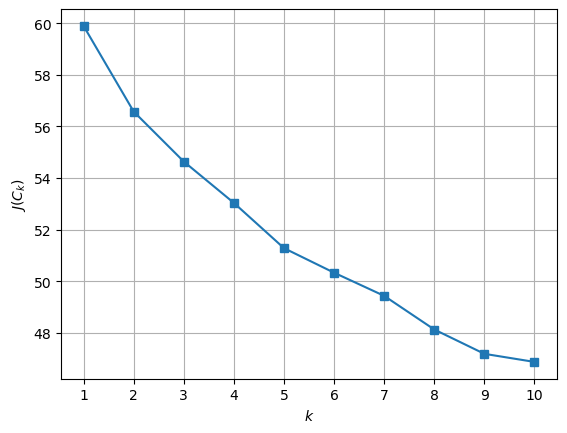

In [78]:
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
  inertia.append(np.sqrt(kmeans.inertia_))

plt.xticks(np.arange(0, 11, step=1))
plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

Явного значения локтя нет. Был взят k=5.

Выполнена кластеризация, посчитан коэффициент силуэта и среднее значения в кластерах.

In [84]:
k_means = KMeans(n_clusters = 5, random_state = 0) # в параметрах задается число кластеров, равное 5, и фиксируется значение random_state для воспроизводимости результата
k_means.fit_predict(df_scaled)

df['cluster'] = k_means.labels_

# коэфф силуэта
score = silhouette_score(df_scaled, df['cluster'])
print("Качество кластеризации по метрике Cилуэта:", score)

cluster_means = df.groupby('cluster').mean()
display(cluster_means)

Качество кластеризации по метрике Cилуэта: 0.10678656047896788


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
cluster,,,,,,,,,,,,
0,60.000000,0.000000,5222.500000,0.375000,36.875000,0.125000,280839.507500,1.910000,138.375000,0.875000,0.500000,68.875000
1,69.216667,0.483333,411.000000,0.300000,32.383333,0.350000,233214.404000,2.090667,132.400000,0.866667,0.150000,84.500000
2,62.937203,0.666667,262.579710,0.362319,44.971014,0.637681,278755.770725,1.325652,138.666667,0.173913,0.028986,100.333333
3,54.156383,0.308642,689.296296,0.641975,37.123457,0.185185,268997.729136,1.086790,137.074074,0.530864,0.000000,186.506173
4,59.592593,0.358025,414.555556,0.333333,37.518519,0.296296,265203.780370,1.191975,137.395062,0.987654,1.000000,139.469136


Коэффициент силуэта небольшой.

Выводы по кластерам:
*   Cluster 0: пациенты в этом кластере не имеют анемии, имеют высокий уровень ферманта КФК в крови, половина из пациентов курят.
*   Cluster 1: в этом кластере находятся самые высоковозрастные пациенты, фракция выброса самая малая среди других кластеров, пациенты обладают самым больгим креатином сыворотки
* Cluster 2: Пациенты в кластере больше подвержены анемии, имеют самый малый уровень ферманента КФК в крови, у большинства пациентов гипертания, а большинство из этих пациентов - женщины
* Cluster 3: Пациенты в кластере самые молодые, которые совсем не курят и за которыми больше всего дней вели наблюдения.
* Cluster 4: Подавляющее большинство пациентов в кластере - это мужчины и все они курят

Расчёт прочих метрик:

In [89]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
import sklearn.metrics as metrics

score = adjusted_mutual_info_score(df_target, df['cluster'], average_method='arithmetic')
print("AMI: " , score)
print(f'ARI: {metrics.adjusted_rand_score(df_target, df["cluster"])}')
print(f'FMI: {metrics.fowlkes_mallows_score(df_target, df["cluster"])}')
print(f'Homogenity: {metrics.homogeneity_score(df_target, df["cluster"])}')
print(f'Completeness: {metrics.completeness_score(df_target, df["cluster"])}')
print(f'V-measure: {metrics.v_measure_score(df_target, df["cluster"])}')

AMI:  0.069957040718691
ARI: 0.06946032596781619
FMI: 0.41678513087238245
Homogenity: 0.12690194682734232
Completeness: 0.054364772729058555
V-measure: 0.07611982513973753


* AMI - оценка на основе взаимной информации, которая измеряет
согласованность двух назначений.

* ARI - измеряет сходства между полученными и базовыми метками.

* FMI - определяет сходство между кластерами.

* Homogenity - описывает, насколько кластер состоит из объектов одного класса.

* Completeness - показывает насколько все объекты одного класса относятся к одному кластеру.

* V-мера - гармоническое среднее полноты и однородности.

Все показатели на низком уровне.

# **Вывод**

Анализ данных показал следующее:

Метод к-ближайших соседей позволяет разделить данные на заранее заданное количество кластеров, что делает его удобным выбором, когда необходимо определенное число кластеров. Этот метод особенно эффективен при работе с большими объемами данных.

Иерархический агломеративный метод строит иерархическую структуру кластеров, количество которых можно выбрать, анализируя дендрограмму. Этот метод хорошо подходит для определения оптимального числа кластеров.

Для оценки качества кластеризации полезно использовать различные метрики. Они помогают не только выбрать оптимальное количество кластеров, но и оценить качество модели.

По результатам лабораторной работы, согласно метрикам, метод к-ближайших соседей продемонстрировал несколько лучшие результаты по сравнению с агломеративным методом, обеспечив более точную кластеризацию данных.